In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [11]:
print("BƯỚC 1: TẢI DỮ LIỆU VÀ KHẢO SÁT NHANH")

input_path = '../../data/clean_movies.csv'
df_work = pd.read_csv(input_path)
df_work = df_work.copy()

print(f"  - Số bản ghi: {len(df_work)}")
print(f"  - Số cột: {len(df_work.columns)}")

print("\nDataFrame:")
print(df_work.info())

print("\nThống kê mô tả:")
print(df_work.describe())

print("\nSố lượng giá trị thiếu (NaN) trong mỗi cột:")
missing_count = df_work.isna().sum()
print(missing_count[missing_count > 0])

BƯỚC 1: TẢI DỮ LIỆU VÀ KHẢO SÁT NHANH
  - Số bản ghi: 1020
  - Số cột: 17

DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1020 non-null   int64  
 1   Title                 1020 non-null   object 
 2   Original Title        1020 non-null   object 
 3   Original Language     1020 non-null   object 
 4   Overview              1020 non-null   object 
 5   Revenue               1020 non-null   float64
 6   Budget                1020 non-null   float64
 7   Runtime               1020 non-null   int64  
 8   Release Date          1019 non-null   object 
 9   Vote Average          1020 non-null   float64
 10  Vote Count            1020 non-null   int64  
 11  Genres                1020 non-null   object 
 12  Production Companies  1020 non-null   object 
 13  Production Countries  1020 non-null  

In [12]:
print("BƯỚC 2: XỬ LÝ BUDGET VÀ REVENUE")

budget_zeros_before = (df_work['Budget'] == 0).sum()
revenue_zeros_before = (df_work['Revenue'] == 0).sum()

df_work['Budget'] = df_work['Budget'].replace(0, np.nan)
df_work['Revenue'] = df_work['Revenue'].replace(0, np.nan)

print(f"\nChuyển 0 về NaN cho Budget: {budget_zeros_before}")
print(f"Chuyển 0 về NaN cho Revenue: {revenue_zeros_before}")

initial_rows = len(df_work)
df_work = df_work.dropna(subset=['Budget', 'Revenue'])
rows_deleted = initial_rows - len(df_work)

print(f"Xóa {rows_deleted} hàng thiếu Budget/Revenue")
print(f"Số hàng còn lại: {len(df_work)}")

BƯỚC 2: XỬ LÝ BUDGET VÀ REVENUE

Chuyển 0 về NaN cho Budget: 0
Chuyển 0 về NaN cho Revenue: 0
Xóa 0 hàng thiếu Budget/Revenue
Số hàng còn lại: 1020


In [13]:

df_work['Release Date'] = pd.to_datetime(df_work['Release Date'], errors='coerce')

invalid_dates = df_work['Release Date'].isna().sum()
print(f"Số bản ghi có ngày không hợp lệ: {invalid_dates}")

df_work['release_year'] = df_work['Release Date'].dt.year
df_work['release_month'] = df_work['Release Date'].dt.month
df_work['release_weekday'] = df_work['Release Date'].dt.dayofweek

print(f"Chuyển Release Date hoàn tất.")


Số bản ghi có ngày không hợp lệ: 1
Chuyển Release Date hoàn tất.


In [16]:
print("BƯỚC 4: TÍNH ROI VÀ TẠO NHÃN SUCCESS")

df_work['roi'] = df_work['Revenue'] / df_work['Budget']
print(f"  - ROI trung bình: {df_work['roi'].mean():.2f}")
print(f"  - ROI min/max: {df_work['roi'].min():.2f} → {df_work['roi'].max():.2f}")

success_threshold_roi = 1.0
success_threshold_rating = 6.5

df_work['success'] = (
    (df_work['roi'] >= success_threshold_roi) & 
    (df_work['Vote Average'] >= success_threshold_rating)
).astype(int)
print(f"Tạo nhãn success với 2 điều kiện:")
print(f"ROI >= {success_threshold_roi}")
print(f"Vote Average >= {success_threshold_rating}")

success_count = (df_work['success'] == 1).sum()
fail_count = (df_work['success'] == 0).sum()
success_rate = success_count / len(df_work) * 100


print(f"Phim thành công (success=1): {success_count} ({success_rate:.1f}%)")
print(f"Phim không thành công (success=0): {fail_count} ({100-success_rate:.1f}%)")

BƯỚC 4: TÍNH ROI VÀ TẠO NHÃN SUCCESS
  - ROI trung bình: 4.08
  - ROI min/max: 0.00 → 125.00
Tạo nhãn success với 2 điều kiện:
ROI >= 1.0
Vote Average >= 6.5
Phim thành công (success=1): 514 (50.4%)
Phim không thành công (success=0): 506 (49.6%)


In [19]:
print("BƯỚC 5: KIỂM TRA CÂN BẰNG LỚP")
class_distribution = df_work['success'].value_counts().sort_index()
print(class_distribution)

if len(class_distribution) == 2:
    ratio = class_distribution.max() / class_distribution.min()
    print(f"\n  - Tỷ lệ imbalance: {ratio:.2f}:1")
    
    if ratio > 3:
        print(f"Cảnh báo: Dữ liệu imbalanced (tỷ lệ > 3:1)")
        print(f"Có thể cần xử lý lại bằng SMOTE hoặc class_weight trong tuần tới")
    else:
        print(f"Dữ liệu cân bằng tương đối tốt")


BƯỚC 5: KIỂM TRA CÂN BẰNG LỚP
success
0    506
1    514
Name: count, dtype: int64

  - Tỷ lệ imbalance: 1.02:1
Dữ liệu cân bằng tương đối tốt


BƯỚC 6: TẠO BIỂU ĐỒ KHÁM PHÁ DỮ LIỆU (EDA)


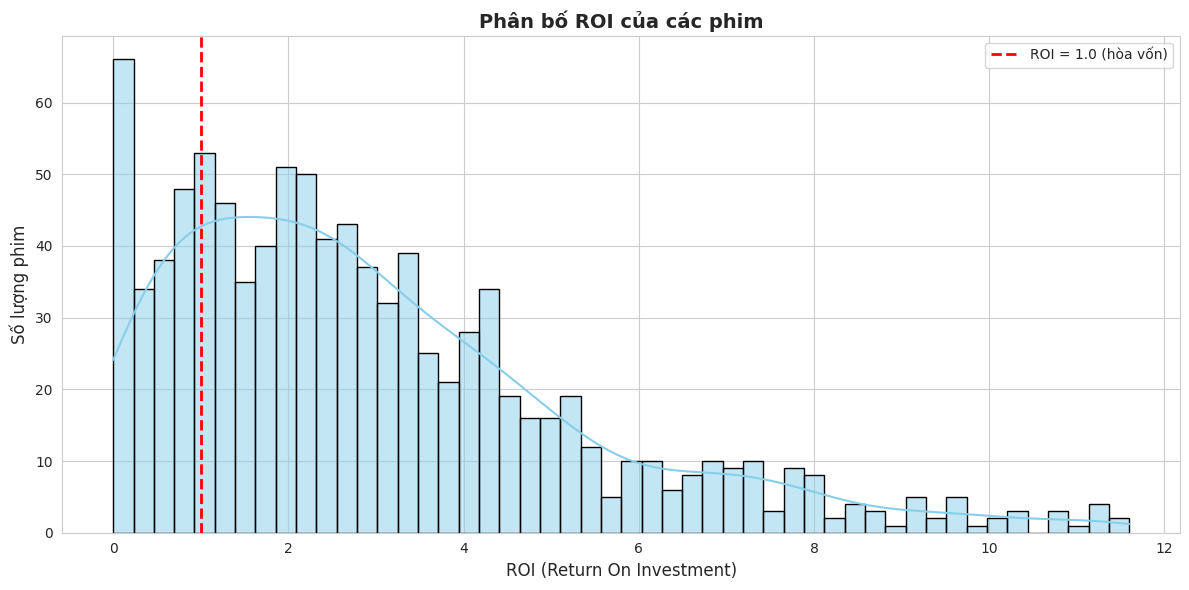

In [22]:
print("BƯỚC 6: TẠO BIỂU ĐỒ KHÁM PHÁ DỮ LIỆU (EDA)")
output_dir = '../../chart'
if 'roi' in df_work.columns:

    plt.figure(figsize=(12, 6))
    
    roi_data = df_work['roi'].dropna()
    roi_data = roi_data[roi_data <= roi_data.quantile(0.95)]
    
    sns.histplot(roi_data, bins=50, kde=True, color='skyblue', edgecolor='black')
    plt.title('Phân bố ROI của các phim', fontsize=14, fontweight='bold')
    plt.xlabel('ROI (Return On Investment)', fontsize=12)
    plt.ylabel('Số lượng phim', fontsize=12)
    plt.axvline(1.0, color='red', linestyle='--', linewidth=2, label='ROI = 1.0 (hòa vốn)')
    plt.legend()
    plt.tight_layout()
    
    roi_plot_path = os.path.join(output_dir, 'roi_distribution.png')
    plt.savefig(roi_plot_path, dpi=100, bbox_inches='tight')
    plt.show()

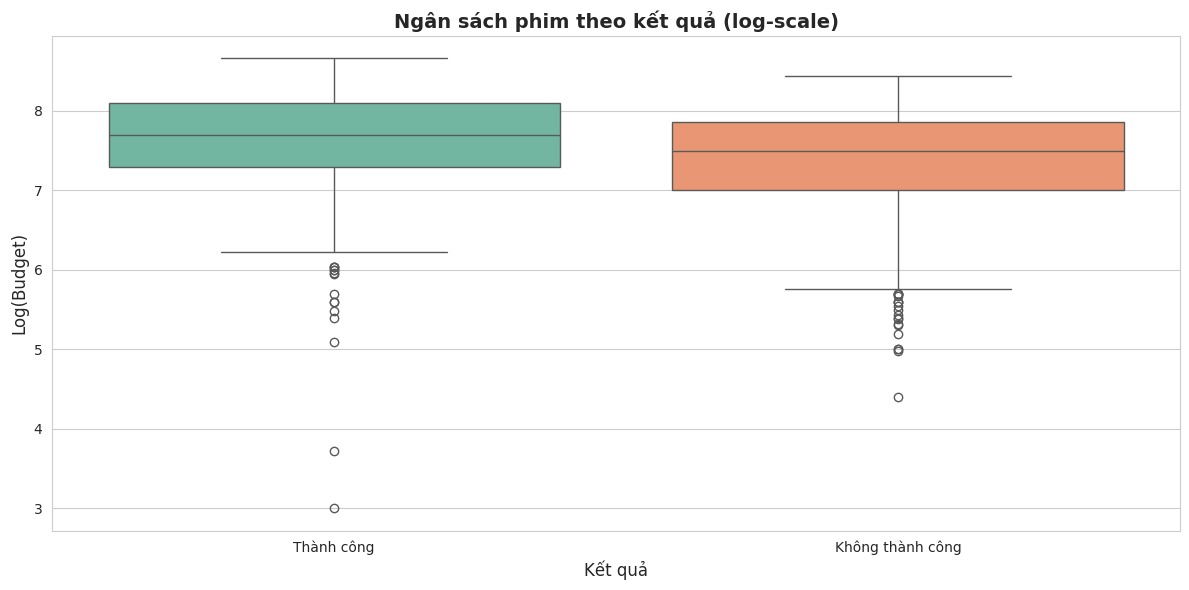

In [23]:
if 'Budget' in df_work.columns and 'success' in df_work.columns:
    plt.figure(figsize=(12, 6))
    
    df_plot = df_work[['Budget', 'success']].dropna().copy()
    df_plot['Budget_log'] = np.log10(df_plot['Budget'] + 1)
    df_plot['success_label'] = df_plot['success'].map({0: 'Không thành công', 1: 'Thành công'})
    
    sns.boxplot(data=df_plot, x='success_label', y='Budget_log', palette='Set2')
    plt.title('Ngân sách phim theo kết quả (log-scale)', fontsize=14, fontweight='bold')
    plt.xlabel('Kết quả', fontsize=12)
    plt.ylabel('Log(Budget)', fontsize=12)
    plt.tight_layout()
    
    budget_plot_path = os.path.join(output_dir, 'budget_by_success.png')
    plt.savefig(budget_plot_path, dpi=100, bbox_inches='tight')
    plt.show()

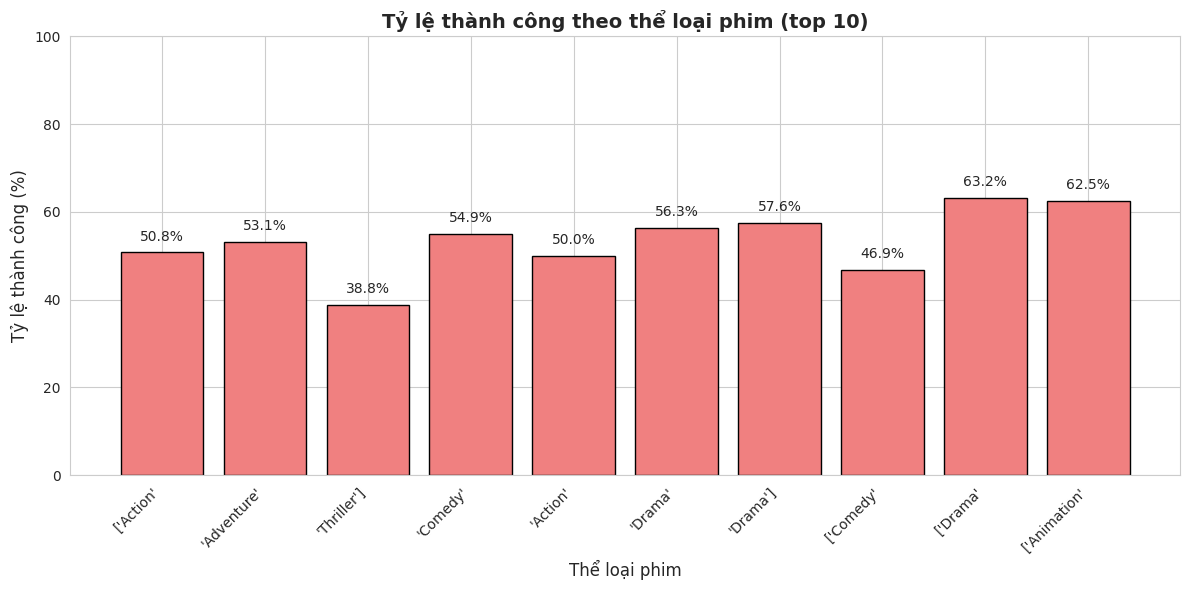

In [25]:
if 'Genres' in df_work.columns and 'success' in df_work.columns:
    try:
        genres_list = []
        success_list = []
        
        for idx, row in df_work[['Genres', 'success']].dropna().iterrows():
            if pd.notna(row['Genres']):
                genres = str(row['Genres']).split(',')
                for genre in genres:
                    genre = genre.strip()
                    if genre:
                        genres_list.append(genre)
                        success_list.append(row['success'])
        
        temp_df = pd.DataFrame({'genre': genres_list, 'success': success_list})
        
        genre_success = temp_df.groupby('genre')['success'].agg(['sum', 'count'])
        genre_success['success_rate'] = genre_success['sum'] / genre_success['count']
        genre_success = genre_success.sort_values('count', ascending=False).head(10)
        
        plt.figure(figsize=(12, 6))
        genres = genre_success.index.tolist()
        rates = (genre_success['success_rate'] * 100).tolist()
        
        bars = plt.bar(genres, rates, color='lightcoral', edgecolor='black')
        plt.title('Tỷ lệ thành công theo thể loại phim (top 10)', fontsize=14, fontweight='bold')
        plt.xlabel('Thể loại phim', fontsize=12)
        plt.ylabel('Tỷ lệ thành công (%)', fontsize=12)
        plt.ylim(0, 100)
        
        for i, (bar, rate) in enumerate(zip(bars, rates)):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                    f'{rate:.1f}%', ha='center', va='bottom', fontsize=10)
        
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        genre_plot_path = os.path.join(output_dir, 'success_rate_by_genre.png')
        plt.savefig(genre_plot_path, dpi=100, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"{e}")

In [27]:
print("\nBƯỚC 7: LƯU DỮ LIỆU ĐÃ GẮN NHÃN")

output_path = f'../../data/clean_movies_with_labels.csv'

df_work.to_csv(output_path, index=False)
print(f"Lưu dữ liệu có nhãn vào: {output_path}")


BƯỚC 7: LƯU DỮ LIỆU ĐÃ GẮN NHÃN
Lưu dữ liệu có nhãn vào: ../../data/clean_movies_with_labels.csv
